## Analysis of Yelp Dataset Portfolio2 

The portfolio aims to use various data processing techniques to clean and preprocess the data, filter out irrelevant data, and remove any outliers that could impact the accuracy of the model. Finally, the portfolio aims to use linear regression models to train and validate the model's accuracy in predicting user ratings towards business. Ultimately, the objective is to build a reliable model that can be used to provide insights into user preferences and help businesses make data-driven decisions to improve their services and offerings. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use Yelp sub-dataset.

### Import the output sample data from Portfolio1
The csv file named `Yelp_Portfolio2_Input.csv` is provided. You may need to use the Pandas method, i.e., `read_csv`, for doing this. After that, please import the csv file and print out its total length.

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [81]:
sample_data = pd.read_csv('files/Yelp_Portfolio2_Input.csv')
print(len(sample_data))

38654


In [82]:
sample_data.head()

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
1,Tattoo; Beauty & Spas,Tempe,WGNIYMeXPyoWav1APUq7jA,23/12/2011,4,"Good tattoo shop. Clean space, multiple artist...",2,Xm8HXE1JHqscXe5BKf0GFQ
2,Tires; Automotive,Glendale,rxQ2PIjhAx6dgAqUalf99Q,9/9/2012,5,Never having dealt with a Discount Tire in Pho...,0,HLbhD2OyiMCUDRR4c1iXaw
3,Sushi Bars; Restaurants,Tempe,EC9WB-iVjd28B6R6KIZ8TA,4/8/2010,4,Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...,0,jdoGEEy5s-5L1O_lNzEi2g
4,Arts & Entertainment; Cinema,Tempe,LDJhwZN14AZOJyHjg2lkRw,13/12/2011,4,We got passes for the preview of Mission Impos...,0,Mb0psF4WQF7gZSuZafVr-g


# Q1. `business_categories` processing

You may notice that there are a total of 693 unique business categories present in the sample data. Please write a code snippet to confirm this number. Then, generate a boxplot of `stars` for `business_categories`.

In [83]:
# your code and solutions

In [84]:
len(sample_data['business_categories'].value_counts())

693

Sometimes we need to extract some major categories, such as `Middle Eastern; Restaurants` and `Sushi Bars; Restaurants`, both of which should belong to the `Restaurants` category.

In [85]:
bc_list = list(sample_data['business_categories'])
type(bc_list)

list

In [86]:
catdict = {}
for bc in bc_list:
    bstr = str(bc)
    ch = ';'
    if ch in bstr:
        temp = bstr.split(';')
        x = (len(temp)) - 1
        if temp[x] not in catdict.keys():
            catdict[temp[x]] = 1
        elif temp[x] in catdict.keys():
            catdict[temp[x]] += 1

In [87]:
catdict

{' Restaurants': 25023,
 ' Beauty & Spas': 475,
 ' Automotive': 324,
 ' Cinema': 218,
 ' Coffee & Tea': 1116,
 ' Furniture Stores': 218,
 " Men's Clothing": 69,
 ' Fitness & Instruction': 336,
 ' Gas & Service Stations': 62,
 ' Hotels': 528,
 ' Shopping': 1054,
 ' Grocery': 390,
 ' Food': 95,
 ' Music Venues': 348,
 ' Venues & Event Spaces': 69,
 ' Nightlife': 372,
 ' Beer, Wine & Spirits': 242,
 ' Fashion': 6,
 ' Italian': 960,
 ' Arts & Entertainment': 59,
 ' Education': 71,
 ' Convenience Stores': 37,
 ' Ice Cream & Frozen Yogurt': 728,
 ' Event Planning & Services': 117,
 ' Rafting/Kayaking': 9,
 ' Accessories': 66,
 ' Bakeries': 64,
 ' Lounges': 109,
 ' Performing Arts': 112,
 ' Desserts': 183,
 ' Chocolatiers & Shops': 45,
 ' Apartments': 52,
 ' Juice Bars & Smoothies': 39,
 ' Pets': 166,
 ' Public Services & Government': 85,
 ' Nail Salons': 219,
 ' Specialty Food': 230,
 ' Arts & Crafts': 40,
 ' Bowling': 37,
 ' Department Stores': 24,
 ' Caterers': 78,
 ' Donuts': 116,
 ' Drug

### Q1.1 How to efficiently and accurately extract the last category value (i.e., categorieN) from the `business_categories` column in a dataset, where the format of each row is a semicolon-separated list of categories (i.e., 'categorie1; categorie2;...;categorieN')? and replace the original string with this last category value. At last, print the first five rows.

In [88]:
for bc in bc_list:
    temp = (str(bc)).split(';')
    l = (len(temp)) - 1
    ind = bc_list.index(bc)
    bc_list[ind] = temp[l]

In [89]:
dict_d = {'bc':bc_list}
df = pd.DataFrame(dict_d)

In [90]:
sample_data.business_categories = df.bc

In [91]:
df_c = sample_data['business_categories']

In [92]:
df_c.head()

0       Restaurants
1     Beauty & Spas
2        Automotive
3       Restaurants
4            Cinema
Name: business_categories, dtype: object

In [93]:
len(sample_data['business_categories'].value_counts())

195

### Q1.2 Let's first check how many unique business categories are present in the dataset (output from Q1.1). Maybe it's still not an appropriate number to make a clear Boxplot. Now, we want to display `ALL Rows` of the business category count data. That is to count and print the number of occurrences for each business category.

In [94]:
# your code and solutions

In [95]:
len(sample_data['business_categories'].value_counts())

195

In [96]:
dict_occur = {}
for b in bc_list:
    if b not in dict_occur.keys():
        dict_occur[b] = 1
    else:
        dict_occur[b] += 1

In [97]:
dict_occur

{' Restaurants': 25023,
 ' Beauty & Spas': 475,
 ' Automotive': 324,
 ' Cinema': 218,
 ' Coffee & Tea': 1116,
 ' Furniture Stores': 218,
 'Religious Organizations': 7,
 " Men's Clothing": 69,
 ' Fitness & Instruction': 336,
 ' Gas & Service Stations': 62,
 ' Hotels': 528,
 ' Shopping': 1054,
 ' Grocery': 390,
 ' Food': 95,
 ' Music Venues': 348,
 ' Venues & Event Spaces': 69,
 ' Nightlife': 372,
 ' Beer, Wine & Spirits': 242,
 ' Fashion': 6,
 ' Italian': 960,
 ' Arts & Entertainment': 59,
 ' Education': 71,
 ' Convenience Stores': 37,
 ' Ice Cream & Frozen Yogurt': 728,
 ' Event Planning & Services': 117,
 ' Rafting/Kayaking': 9,
 ' Accessories': 66,
 ' Bakeries': 64,
 'Restaurants': 189,
 ' Lounges': 109,
 ' Performing Arts': 112,
 ' Desserts': 183,
 ' Chocolatiers & Shops': 45,
 ' Apartments': 52,
 ' Juice Bars & Smoothies': 39,
 ' Pets': 166,
 ' Public Services & Government': 85,
 ' Nail Salons': 219,
 ' Specialty Food': 230,
 ' Arts & Crafts': 40,
 ' Bowling': 37,
 ' Department Sto

### Q1.3 We want to remove categories that appear fewer than 200 times. Write a Python code snippet to perform this operation. At last, print the number of resulting unique business_categories.

In [98]:
# your code and solutions

In [99]:
bdict = {}
for occ in dict_occur.keys():
    if (dict_occur[occ] >= 200):
        bdict[occ] = dict_occur[occ]
        

In [100]:
bdict

{' Restaurants': 25023,
 ' Beauty & Spas': 475,
 ' Automotive': 324,
 ' Cinema': 218,
 ' Coffee & Tea': 1116,
 ' Furniture Stores': 218,
 ' Fitness & Instruction': 336,
 ' Hotels': 528,
 ' Shopping': 1054,
 ' Grocery': 390,
 ' Music Venues': 348,
 ' Nightlife': 372,
 ' Beer, Wine & Spirits': 242,
 ' Italian': 960,
 ' Ice Cream & Frozen Yogurt': 728,
 ' Nail Salons': 219,
 ' Specialty Food': 230,
 ' Stadiums & Arenas': 275,
 ' Bookstores': 208}

In [101]:
unique_b = list(bdict.keys())

In [102]:
len(unique_b)

19

In [103]:
for bs in sample_data['business_categories']:
    if bs not in unique_b:
        sample_data = sample_data.drop(sample_data[sample_data.business_categories == bs].index) 

In [104]:
sample_data.head()

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
1,Beauty & Spas,Tempe,WGNIYMeXPyoWav1APUq7jA,23/12/2011,4,"Good tattoo shop. Clean space, multiple artist...",2,Xm8HXE1JHqscXe5BKf0GFQ
2,Automotive,Glendale,rxQ2PIjhAx6dgAqUalf99Q,9/9/2012,5,Never having dealt with a Discount Tire in Pho...,0,HLbhD2OyiMCUDRR4c1iXaw
3,Restaurants,Tempe,EC9WB-iVjd28B6R6KIZ8TA,4/8/2010,4,Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...,0,jdoGEEy5s-5L1O_lNzEi2g
4,Cinema,Tempe,LDJhwZN14AZOJyHjg2lkRw,13/12/2011,4,We got passes for the preview of Mission Impos...,0,Mb0psF4WQF7gZSuZafVr-g


In [105]:
len(sample_data['business_categories'].value_counts())

19

In [106]:
(sample_data['business_categories'].count())

33264

In [107]:
len(sample_data.index)

33264

# Q2. Outliers

### Q2.1 Remove any rows from the sample_data DataFrame (output from Q1.3) where the `useful` column has a value of 6 or more; Then, create a single figure with two subplots, one showing the boxplot of `useful` column of the original data and the other showing the boxplot of the data with outliers removed. 

At last, __print the length of the data__.

In [108]:
# your code and solutions

In [109]:
df1 =pd.DataFrame({'useful': list(sample_data['useful']), 'ur': np.repeat(0,33264)})

In [110]:
sample_data[sample_data.useful >= 6] = np.nan
df2 = pd.DataFrame({'useful': list(sample_data['useful']),'ur': np.repeat(1,33264)})

In [111]:
df3 = sample_data[sample_data.useful < 6]

<AxesSubplot:title={'center':'useful'}, xlabel='ur'>

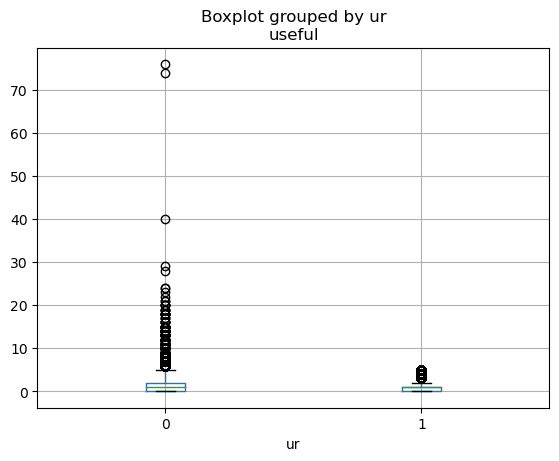

In [112]:
pd.concat([df1,df2]).boxplot(column='useful',by='ur')

In [113]:
len(list(df3['useful']))

32330

### Q2.2 In general, we might remove some inactive users from a dataset (output from Q2.1), for example, users who rate businesses less than 3 times. However, in this case, we are doing the opposite and removing extremely active users who rate businesses more than 30 times (>30). Again, create a single figure with two subplots, one showing the boxplot of the count of business rating given by each user and the other showing the boxplot of the data with outliers removed. 

At last, __print the length of the data__.

In [114]:
df3.head()

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4.0,love the gyro plate. Rice is so good and I als...,1.0,0hT2KtfLiobPvh6cDC8JQg
1,Beauty & Spas,Tempe,WGNIYMeXPyoWav1APUq7jA,23/12/2011,4.0,"Good tattoo shop. Clean space, multiple artist...",2.0,Xm8HXE1JHqscXe5BKf0GFQ
2,Automotive,Glendale,rxQ2PIjhAx6dgAqUalf99Q,9/9/2012,5.0,Never having dealt with a Discount Tire in Pho...,0.0,HLbhD2OyiMCUDRR4c1iXaw
3,Restaurants,Tempe,EC9WB-iVjd28B6R6KIZ8TA,4/8/2010,4.0,Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...,0.0,jdoGEEy5s-5L1O_lNzEi2g
4,Cinema,Tempe,LDJhwZN14AZOJyHjg2lkRw,13/12/2011,4.0,We got passes for the preview of Mission Impos...,0.0,Mb0psF4WQF7gZSuZafVr-g


In [115]:
exactive = {}
for uid in df3.user_id:
    if uid not in exactive.keys():
        exactive[uid] = 1
    else:
        exactive[uid] += 1

In [116]:
exactive

{'0hT2KtfLiobPvh6cDC8JQg': 2,
 'Xm8HXE1JHqscXe5BKf0GFQ': 42,
 'HLbhD2OyiMCUDRR4c1iXaw': 2,
 'jdoGEEy5s-5L1O_lNzEi2g': 5,
 'Mb0psF4WQF7gZSuZafVr-g': 10,
 'xw77viWz_BbmyntxoBVH4A': 2,
 'EPROVap0M19Y6_4uf3eCmQ': 4,
 'gTCM7qlVrwdml-hFB6aJqQ': 14,
 'aLTl_OkLo0BFRxdz1n6sYA': 11,
 'O3huqF3nBeWP9Zd6NmCAaQ': 7,
 'YBVdmm5zlpLpi2_DiKsd2A': 2,
 'Gi_ZP3Pjdvc9-a8aS3SH0A': 3,
 'thlVIc8s6ZCP37UGMf3yDA': 17,
 '8-2W5CmkDl9vrkxRpkiPRg': 26,
 'jKeaOrPyJ-dI9SNeVqrbww': 23,
 '4B6aJJTELjivUXrL_LTlqQ': 1,
 'rVlgz-MGYRPa8UzTYO0RGQ': 6,
 '1wMGLaMIH7CcmJ2htS1rmw': 16,
 '_PzSNcfrCjeBxSLXRoMmgQ': 77,
 'b60JsTGYbVqUGYbI81aOsw': 24,
 'YPk47NcyWSkk-541OxyzMQ': 25,
 'nH0YyEYTE7RMeAbeERrSQA': 3,
 'pRw80rCPUTcBo2Zv5De1yQ': 1,
 '6OWHDbEq23f24Vki_veHBA': 50,
 'ETIAM78kYT_xPM8b2iqi7g': 8,
 'px6RIT_CcE2Z1Jd52C8TQQ': 8,
 'X5GbNXY_nNoa_vTZDD0aCA': 58,
 'lAngRi4lwBIHmjCBVLd-8Q': 6,
 'Pk5T0OFCbl8mIKkKYyglWQ': 9,
 'KucBnMrhalzxnD9AWrxwYQ': 13,
 'vOw4NYgKe57qcJ5fOjk6PQ': 4,
 '7kRN8IkOWlLblEltNlnfRQ': 10,
 'VyzwBKnq-LJ8OjvG0ZTwrg'

In [117]:
countlist_outliers = list(exactive.values())
templist = countlist_outliers

In [118]:
len(templist)

12546

In [119]:
uids30 = []
for uid in exactive.keys():
    if exactive[uid] >= 30:
        uids30.append(uid)

In [120]:
for ud in df3['user_id']:
    if ud in uids30:
        df3 = df3.drop(df3[df3.user_id == ud].index) 

In [121]:
xlist = []
for i in range(0,len(countlist_outliers)):
    if countlist_outliers[i] < 30:
        xlist.append(countlist_outliers[i])
    
        

In [122]:
len(xlist)

12482

In [123]:
df5 = pd.DataFrame({'count1': templist})
df6 = pd.DataFrame({'count2':xlist })
df7 = df5.merge(df6,how='left', left_on='count1', right_on='count2')
df7.head()

,count1,count2
0,2,2.0
1,2,2.0
2,2,2.0
3,2,2.0
4,2,2.0


<AxesSubplot:>

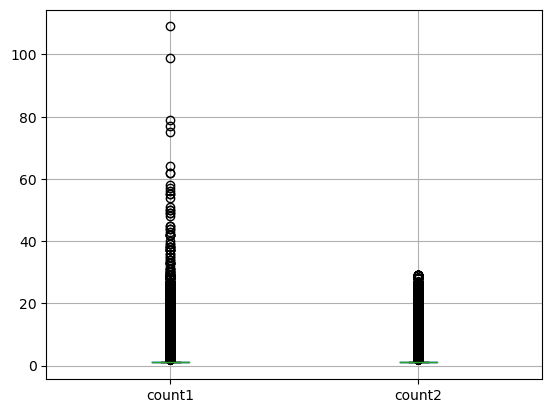

In [124]:
df7.boxplot()

In [125]:
len(list(df6.count2))

12482

# Q3. Training a LinearRegression model on the data output from Q2.2.

### Q3.1 How to build a linear regression model on a subset of the data, using the `useful` column as the input variable and the `stars` column as the output variable. Split the data into a training set and a test set, with 70% of the data used for training. The random_state is set to 42.

In [126]:
# your code and solutions

In [127]:
df3.head()

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4.0,love the gyro plate. Rice is so good and I als...,1.0,0hT2KtfLiobPvh6cDC8JQg
2,Automotive,Glendale,rxQ2PIjhAx6dgAqUalf99Q,9/9/2012,5.0,Never having dealt with a Discount Tire in Pho...,0.0,HLbhD2OyiMCUDRR4c1iXaw
3,Restaurants,Tempe,EC9WB-iVjd28B6R6KIZ8TA,4/8/2010,4.0,Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...,0.0,jdoGEEy5s-5L1O_lNzEi2g
4,Cinema,Tempe,LDJhwZN14AZOJyHjg2lkRw,13/12/2011,4.0,We got passes for the preview of Mission Impos...,0.0,Mb0psF4WQF7gZSuZafVr-g
5,Coffee & Tea,Tempe,o5x6DF0KK1OBsiUOx2gavg,4/2/2010,4.0,"This would most certainly be ""my"" coffee shop ...",0.0,xw77viWz_BbmyntxoBVH4A


In [128]:
x = df3[['useful']]
y = df3[['stars']]

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 42,test_size = 0.3,shuffle = True)


In [130]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print(model.coef_)
print(model.intercept_)

[[-0.07799]]
[3.80422854]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- useful
Feature names seen at fit time, yet now missing:
- business_review_count

  warnings.warn(message, FutureWarning)


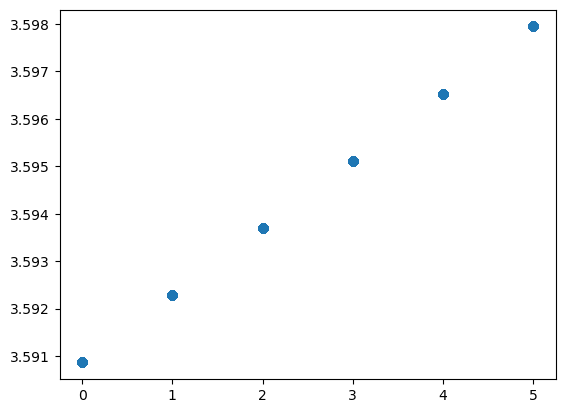

In [155]:
predictions = model.predict(x_test)

plt.scatter(x_test, predictions)


(array([ 720.,    0.,  819.,   22., 1215.,  123., 1489., 1596.,    0.,
        2858.]),
 array([-2.80422854, -2.36523354, -1.92623854, -1.48724354, -1.04824854,
        -0.60925354, -0.17025854,  0.26873646,  0.70773146,  1.14672645,
         1.58572145]),
 <BarContainer object of 10 artists>)

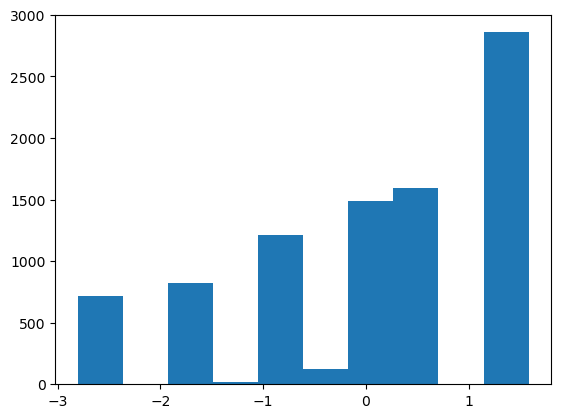

In [132]:
plt.hist(y_test - predictions)

In [133]:
from sklearn import metrics
metrics.mean_squared_error(y_test, predictions)

1.5098839615887112

### Q3.2 Assuming that the number of reviews a business has received  `business_review_count`  can greatly influence the average rating that the business has received. Now, we create the relevant variable to the data, and do the LinearRegression again to the `stars`. 

In [134]:
df3.head()

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4.0,love the gyro plate. Rice is so good and I als...,1.0,0hT2KtfLiobPvh6cDC8JQg
2,Automotive,Glendale,rxQ2PIjhAx6dgAqUalf99Q,9/9/2012,5.0,Never having dealt with a Discount Tire in Pho...,0.0,HLbhD2OyiMCUDRR4c1iXaw
3,Restaurants,Tempe,EC9WB-iVjd28B6R6KIZ8TA,4/8/2010,4.0,Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...,0.0,jdoGEEy5s-5L1O_lNzEi2g
4,Cinema,Tempe,LDJhwZN14AZOJyHjg2lkRw,13/12/2011,4.0,We got passes for the preview of Mission Impos...,0.0,Mb0psF4WQF7gZSuZafVr-g
5,Coffee & Tea,Tempe,o5x6DF0KK1OBsiUOx2gavg,4/2/2010,4.0,"This would most certainly be ""my"" coffee shop ...",0.0,xw77viWz_BbmyntxoBVH4A


In [135]:
bdr_count = {}
for bd in df3['business_id']:
    if bd not in bdr_count.keys():
        bdr_count[bd] = 1
    else:
        bdr_count[bd] += 1
    

In [136]:
count_list = []
for bd in df3['business_id']:
    count_list.append(bdr_count[bd])

In [137]:
len(count_list)

29471

In [138]:
count_list

[231,
 10,
 184,
 20,
 27,
 4,
 95,
 16,
 181,
 430,
 20,
 63,
 25,
 69,
 20,
 7,
 4,
 69,
 44,
 15,
 33,
 17,
 274,
 158,
 55,
 41,
 47,
 274,
 57,
 5,
 70,
 270,
 52,
 7,
 54,
 47,
 3,
 21,
 152,
 32,
 52,
 16,
 61,
 27,
 142,
 30,
 224,
 66,
 7,
 430,
 270,
 93,
 29,
 92,
 5,
 25,
 115,
 22,
 230,
 17,
 52,
 10,
 46,
 4,
 5,
 17,
 116,
 145,
 231,
 6,
 73,
 25,
 274,
 4,
 70,
 29,
 274,
 4,
 94,
 95,
 270,
 59,
 42,
 12,
 192,
 69,
 209,
 3,
 90,
 41,
 17,
 4,
 209,
 42,
 25,
 4,
 72,
 26,
 65,
 231,
 233,
 11,
 26,
 16,
 19,
 142,
 61,
 35,
 4,
 24,
 11,
 93,
 30,
 99,
 50,
 229,
 515,
 143,
 270,
 83,
 184,
 3,
 274,
 231,
 270,
 19,
 32,
 116,
 66,
 56,
 4,
 99,
 40,
 73,
 69,
 78,
 41,
 515,
 16,
 9,
 67,
 15,
 41,
 157,
 12,
 27,
 672,
 78,
 430,
 4,
 36,
 120,
 69,
 1,
 274,
 28,
 12,
 672,
 15,
 32,
 270,
 59,
 26,
 55,
 99,
 52,
 101,
 672,
 17,
 42,
 53,
 21,
 109,
 18,
 56,
 2,
 274,
 67,
 101,
 231,
 69,
 63,
 122,
 7,
 274,
 69,
 52,
 7,
 10,
 672,
 99,
 50,
 79,
 22,
 5

In [143]:
df3['business_id'].count()

29471

In [150]:
df_sub = df3[['business_id','stars']]
df_count = pd.DataFrame({'business_id':df_sub.business_id,'stars':df_sub.stars,'business_review_count':count_list})
df_count.head()

,business_id,stars,business_review_count
0,6oRAC4uyJCsJl1X0WZpVSA,4.0,231
2,rxQ2PIjhAx6dgAqUalf99Q,5.0,10
3,EC9WB-iVjd28B6R6KIZ8TA,4.0,184
4,LDJhwZN14AZOJyHjg2lkRw,4.0,20
5,o5x6DF0KK1OBsiUOx2gavg,4.0,27


In [151]:
x1 = df_count[['business_review_count']]
y1 = df_count[['stars']]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1,random_state = 42,test_size = 0.3,shuffle = True)

In [152]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x1_train, y1_train)
print(model.coef_)
print(model.intercept_)

[[0.00141606]]
[3.59086612]


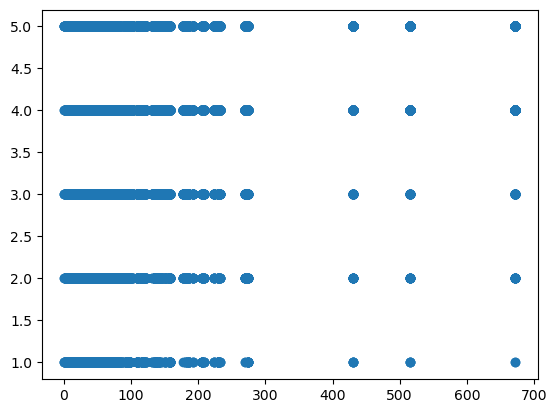

In [158]:
plt.scatter(x1_train,y1_train)

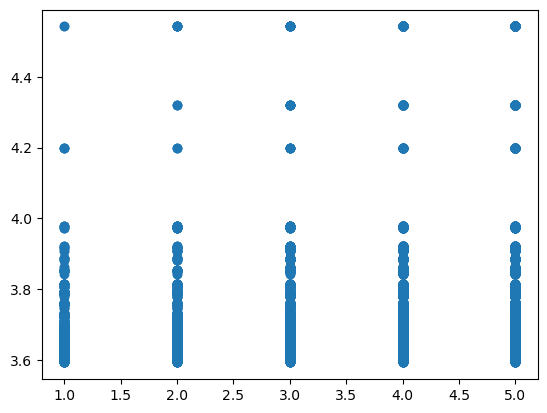

In [156]:
predict = model.predict(x1_test)

plt.scatter(y1_test, predict)

(array([ 720.,    0.,  841.,    0.,  123., 1215.,    0., 3085.,    0.,
        2858.]),
 array([-2.59794641, -2.19723838, -1.79653035, -1.39582232, -0.99511429,
        -0.59440626, -0.19369823,  0.2070098 ,  0.60771782,  1.00842585,
         1.40913388]),
 <BarContainer object of 10 artists>)

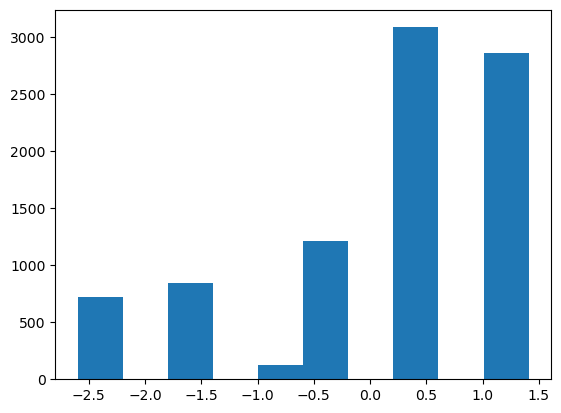

In [157]:
plt.hist(y1_test - predictions)

In [142]:
# your code and solutions

### Q3.3 Output the correlations between `business_review_count` and `useful` variables with `stars` and analyze the results.

In [ ]:
# your code and solutions

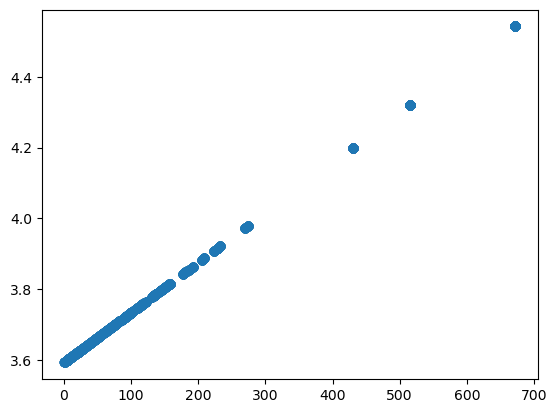

In [159]:
plt.scatter(x1_test, predict)

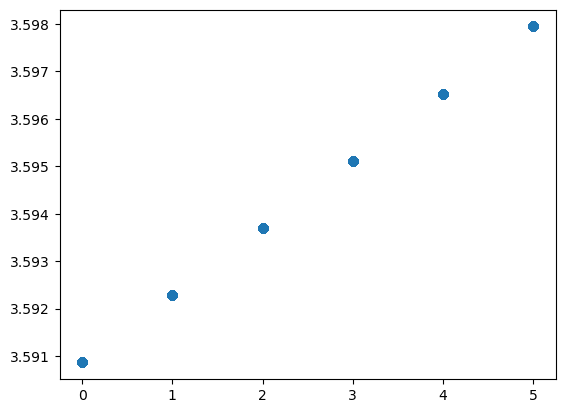

In [160]:
plt.scatter(x_test,predictions)